## Khám phá dữ liệu

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
train = pd.read_csv('Data/titanic/train.csv')
test = pd.read_csv('Data/titanic/test.csv')
print(train.info())
print(train.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

## Xử lý dữ liệu (Data Preprocessing)

In [ ]:
# Kiểm tra số lượng giá trị thiếu trong cột 'Age'
print(f"Số giá trị thiếu trong cột 'Age': {train['Age'].isnull().sum()}")

# Điền giá trị thiếu bằng trung vị (median)
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

Số giá trị thiếu trong cột 'Age': 177


C:\Users\thing\AppData\Local\Temp\ipykernel_9868\2349702480.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\thing\AppData\Local\Temp\ipykernel_9868\2349702480.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [ ]:
# Kiểm tra số lượng giá trị thiếu trong cột 'Embarked'
print(f"Số giá trị thiếu trong cột 'Embarked': {train['Embarked'].isnull().sum()}")

# Điền giá trị thiếu bằng mode (giá trị xuất hiện nhiều nhất)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

Số giá trị thiếu trong cột 'Embarked': 2


C:\Users\thing\AppData\Local\Temp\ipykernel_9868\696037272.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
C:\Users\thing\AppData\Local\Temp\ipykernel_9868\696037272.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [ ]:
# Tập test có thể chứa giá trị thiếu trong cột 'Fare'
print(f"Số giá trị thiếu trong cột 'Fare' (test): {test['Fare'].isnull().sum()}")

# Điền giá trị thiếu bằng trung vị
test['Fare'].fillna(test['Fare'].median(), inplace=True)

Số giá trị thiếu trong cột 'Fare' (test): 1


C:\Users\thing\AppData\Local\Temp\ipykernel_9868\2936649150.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Fare'].fillna(test['Fare'].median(), inplace=True)


In [5]:
# Encoding cột 'Sex'
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [6]:
# Encoding cột 'Embarked'
train['Embarked'] = train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test['Embarked'] = test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [7]:
# Kiểm tra xem còn giá trị thiếu hay không
print(train.isnull().sum())
print(test.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


## Phân tích dữ liệu (Exploratory Data Analysis - EDA)



### 1. Thống kê tổng quan dữ liệu


In [8]:
# Xem thông tin tổng quan
print(train.info())

# Thống kê số liệu
print(train.describe())

# Kiểm tra sự phân bố của nhãn mục tiêu 'Survived'
print(train['Survived'].value_counts(normalize=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642    0.352413   29.361582   
std     257.353842    0.48659

C:\Users\thing\AppData\Local\Temp\ipykernel_9868\105117954.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train, palette='pastel')


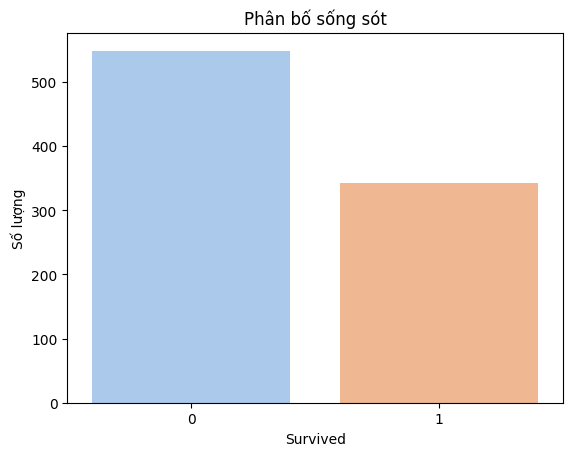

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Biểu đồ cột cho cột 'Survived'
sns.countplot(x='Survived', data=train, palette='pastel')
plt.title('Phân bố sống sót')
plt.xlabel('Survived')
plt.ylabel('Số lượng')
plt.show()


### 2. Phân tích từng đặc điểm (Univariate Analysis)


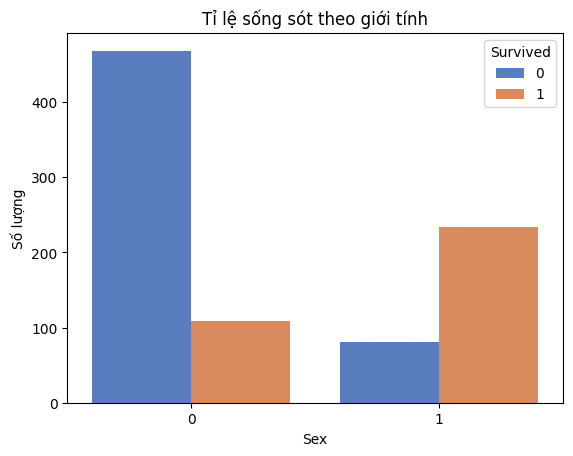

In [10]:
# Giới tính
sns.countplot(x='Sex', hue='Survived', data=train, palette='muted')
plt.title('Tỉ lệ sống sót theo giới tính')
plt.xlabel('Sex')
plt.ylabel('Số lượng')
plt.show()


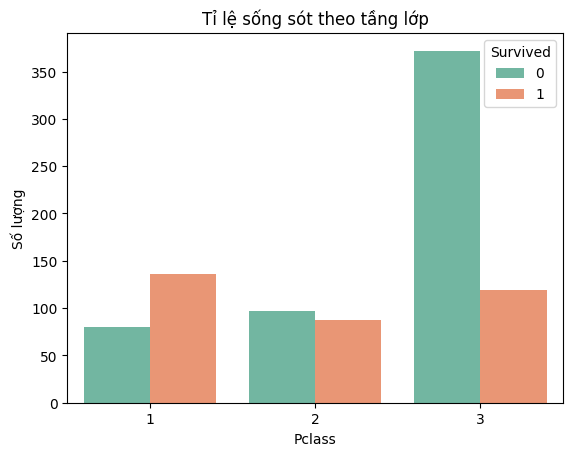

In [11]:
# Tầng lớp Pclass
sns.countplot(x='Pclass', hue='Survived', data=train, palette='Set2')
plt.title('Tỉ lệ sống sót theo tầng lớp')
plt.xlabel('Pclass')
plt.ylabel('Số lượng')
plt.show()


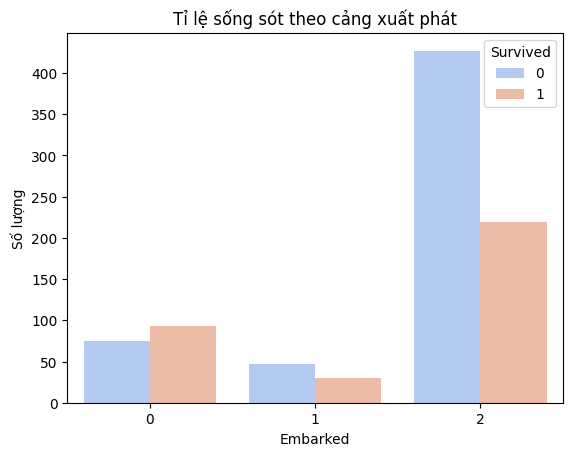

In [12]:
# Embarked
sns.countplot(x='Embarked', hue='Survived', data=train, palette='coolwarm')
plt.title('Tỉ lệ sống sót theo cảng xuất phát')
plt.xlabel('Embarked')
plt.ylabel('Số lượng')
plt.show()


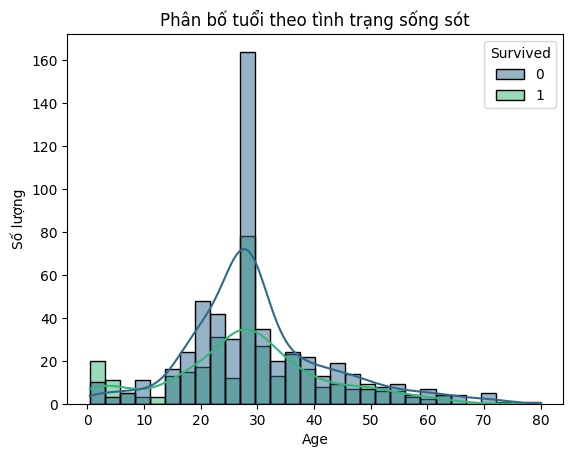

In [13]:
# Age
sns.histplot(train, x='Age', hue='Survived', kde=True, palette='viridis', bins=30)
plt.title('Phân bố tuổi theo tình trạng sống sót')
plt.xlabel('Age')
plt.ylabel('Số lượng')
plt.show()


C:\Users\thing\AppData\Local\Temp\ipykernel_9868\395112912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=train, palette='coolwarm')


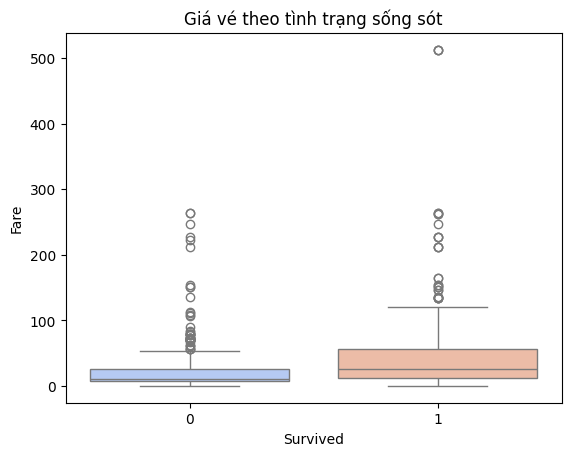

In [14]:
# Fare
sns.boxplot(x='Survived', y='Fare', data=train, palette='coolwarm')
plt.title('Giá vé theo tình trạng sống sót')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()


### 3. Phân tích mối quan hệ giữa các đặc điểm (Bivariate Analysis)

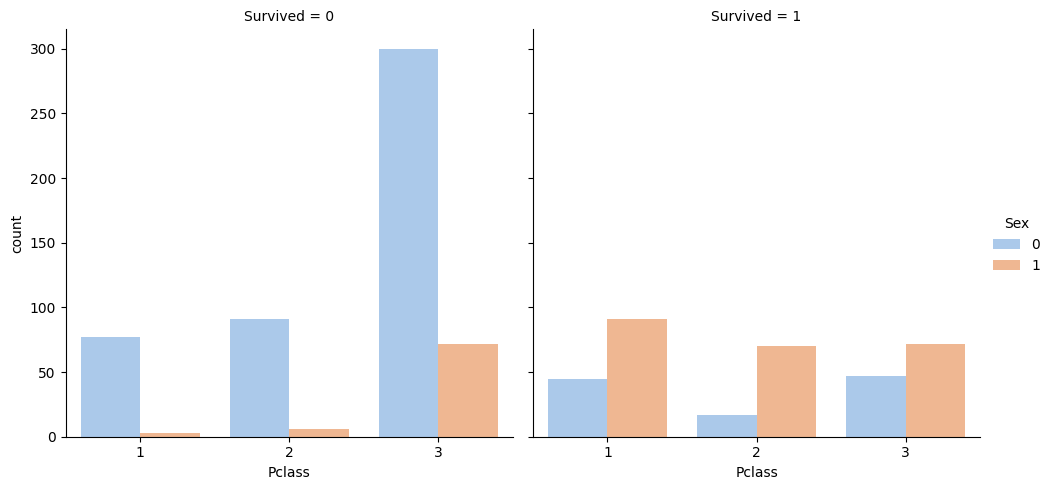

In [15]:
# Mối quan hệ giữa tầng lớp xã hội và giới tính
sns.catplot(x='Pclass', hue='Sex', col='Survived', kind='count', data=train, palette='pastel')
plt.show()


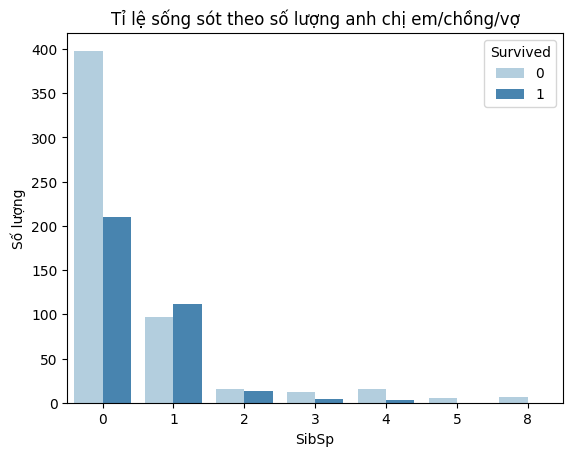

In [16]:
# Mối quan hệ giữa số lượng anh chị em/người thân (SibSp, Parch) và sống sót
sns.countplot(x='SibSp', hue='Survived', data=train, palette='Blues')
plt.title('Tỉ lệ sống sót theo số lượng anh chị em/chồng/vợ')
plt.xlabel('SibSp')
plt.ylabel('Số lượng')
plt.show()


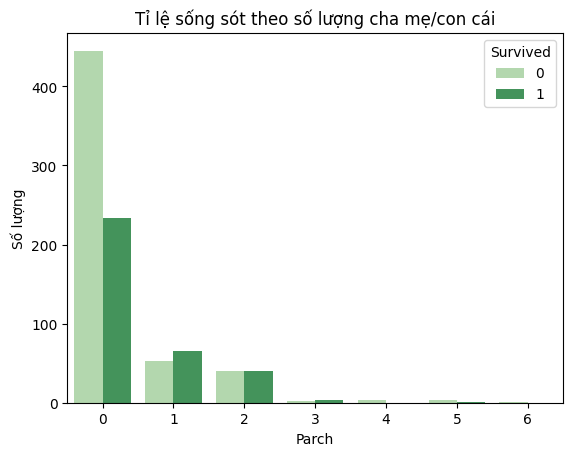

In [17]:
sns.countplot(x='Parch', hue='Survived', data=train, palette='Greens')
plt.title('Tỉ lệ sống sót theo số lượng cha mẹ/con cái')
plt.xlabel('Parch')
plt.ylabel('Số lượng')
plt.show()


### 4. Phân tích tương quan (Correlation Analysis)


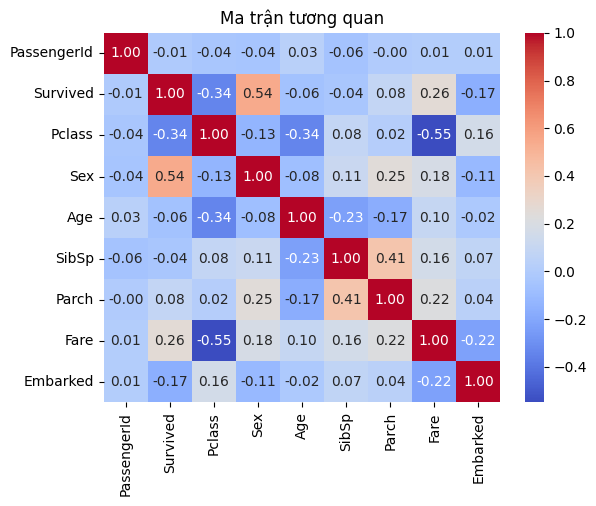

In [18]:
# Lọc chỉ các cột số trong dataset
numeric_features = train.select_dtypes(include=['float64', 'int64'])

# Tính ma trận tương quan với dữ liệu số
correlation = numeric_features.corr()

# Trực quan hóa ma trận tương quan
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan')
plt.show()



## Xây dựng mô hình (Modeling)



### Chia tập dữ liệu 

In [19]:
# Các cột đặc điểm cần thiết
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Tạo X và y từ tập train
X = train[features]
y = train['Survived']

# Chuẩn bị tập test
X_test = test[features]


In [20]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic Regression


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Khởi tạo mô hình
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Huấn luyện mô hình
logreg.fit(X_train, y_train)

# Dự đoán trên tập validation
y_pred_val = logreg.predict(X_val)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Accuracy (Logistic Regression): {accuracy:.4f}")


Accuracy (Logistic Regression): 0.8101


### RandomForest

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
rf.fit(X_train, y_train)

# Dự đoán trên tập validation
y_pred_val_rf = rf.predict(X_val)

# Đánh giá độ chính xác
accuracy_rf = accuracy_score(y_val, y_pred_val_rf)
print(f"Accuracy (Random Forest): {accuracy_rf:.4f}")


Accuracy (Random Forest): 0.8156


### GradientBoosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

# Khởi tạo mô hình
gb = GradientBoostingClassifier(random_state=42)

# Huấn luyện mô hình
gb.fit(X_train, y_train)

# Dự đoán trên tập validation
y_pred_val_gb = gb.predict(X_val)

# Đánh giá độ chính xác
accuracy_gb = accuracy_score(y_val, y_pred_val_gb)
print(f"Accuracy (Gradient Boosting): {accuracy_gb:.4f}")


Accuracy (Gradient Boosting): 0.8101


## 5. Đánh giá model

Confusion Matrix và Classification Report


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion matrix cho mô hình tốt nhất (ví dụ: Random Forest)
conf_matrix = confusion_matrix(y_val, y_pred_val_rf)
print("Confusion Matrix:\n", conf_matrix)

# Báo cáo chi tiết
print("Classification Report:\n", classification_report(y_val, y_pred_val_rf))


Confusion Matrix:
 [[90 15]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



ROC Curve và AUC Score

AUC Score (Random Forest): 0.8945


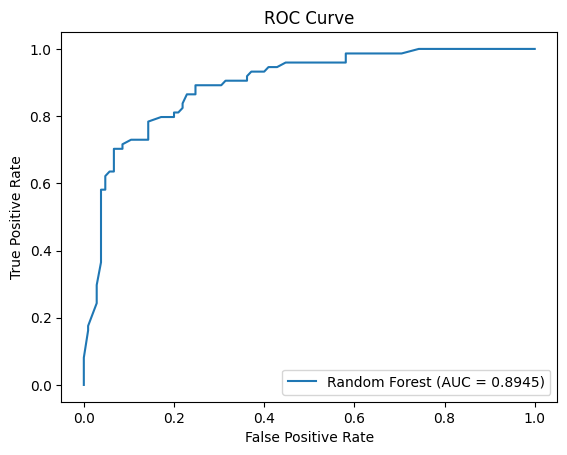

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve

# Tính xác suất dự đoán (Random Forest)
y_prob_rf = rf.predict_proba(X_val)[:, 1]
auc_score = roc_auc_score(y_val, y_prob_rf)
print(f"AUC Score (Random Forest): {auc_score:.4f}")

# Vẽ đường ROC
fpr, tpr, thresholds = roc_curve(y_val, y_prob_rf)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.4f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [27]:
# Dự đoán trên tập test (Random Forest là mô hình tốt nhất trong ví dụ này)
y_test_pred = rf.predict(X_test)

# Tạo DataFrame để lưu kết quả
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_test_pred})

# Lưu file submission
submission.to_csv('submission.csv', index=False)

Độ chính xác tổng quát (Accuracy)
- Accuracy = 82%: Mô hình dự đoán đúng 82% tổng số trường hợp. Đây là một kết quả khá tốt, đặc biệt với bài toán như Titanic nơi tỷ lệ sống sót không cân bằng.

Hiệu suất trên từng lớp
- Lớp 0 (Không sống sót):
    - Precision = 83%: Trong số các dự đoán là "không sống sót", 83% là đúng.
    - Recall = 86%: Trong số các hành khách thực sự "không sống sót", mô hình dự đoán đúng 86%.
    - F1-Score = 85%: Điểm F1 cho thấy sự cân bằng tốt giữa precision và recall cho lớp này.
- Lớp 1 (Sống sót):
    - Precision = 79%: Trong số các dự đoán là "sống sót", 79% là đúng.
    - Recall = 76%: Mô hình nhận diện đúng 76% hành khách thực sự sống sót.
    - F1-Score = 77%: F1-score của lớp này thấp hơn so với lớp 0, cho thấy mô hình hơi kém hiệu quả trong việc nhận diện người sống sót.

Hiệu suất tổng quát
- Macro Avg và Weighted Avg = 81% (F1-Score):
- Các chỉ số trung bình giữa hai lớp là đồng đều, cho thấy mô hình không bị thiên vị nghiêm trọng với bất kỳ lớp nào.

Ma trận nhầm lẫn
- True Negatives (TN) = 90: Mô hình dự đoán đúng 90 người "không sống sót".
- False Positives (FP) = 15: Mô hình nhầm lẫn 15 người "không sống sót" thành "sống sót".
- False Negatives (FN) = 18: Mô hình nhầm lẫn 18 người "sống sót" thành "không sống sót".
- True Positives (TP) = 56: Mô hình dự đoán đúng 56 người "sống sót".

Nhận xét từ ma trận nhầm lẫn:
- Số False Negatives (18) cao hơn một chút so với False Positives (15), do mô hình chưa tối ưu trong việc nhận diện hành khách sống sót.
